<a href="https://colab.research.google.com/github/Byte-framework/Advanced-ML-coursework/blob/main/FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the necessary libraries

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import PIL
from tensorflow.keras.models import Sequential
import os, random
from IPython.display import Image, display

In [ ]:
#Defining training data

train=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/adv_ml/seg_train/seg_train',
    labels="inferred",
    batch_size=32,
    image_size=(100, 100),
    seed=123,
    validation_split=0.2,
    subset='training'
)

Found 14054 files belonging to 6 classes.
Using 11244 files for training.


In [ ]:
#Defining validation data

valid=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/adv_ml/seg_train/seg_train',
    labels="inferred",
    batch_size=32,
    image_size=(100, 100),
    seed=123,
    validation_split=0.2,
    subset='validation'
)

Found 14054 files belonging to 6 classes.
Using 2810 files for validation.


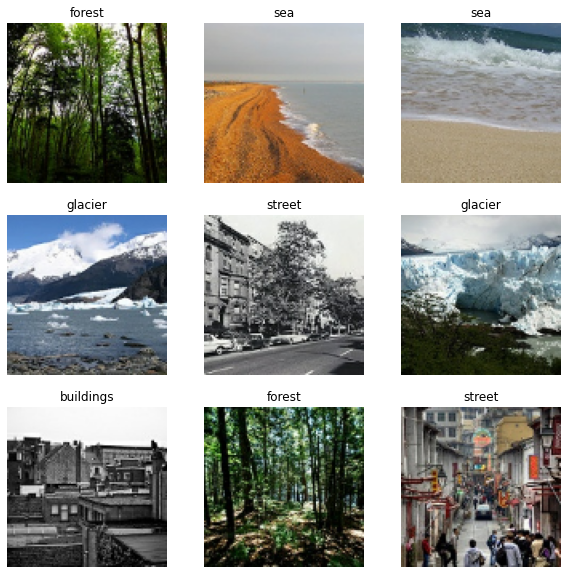

In [ ]:
#Some pictures in training data

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train.class_names[labels[i]])
    plt.axis("off")

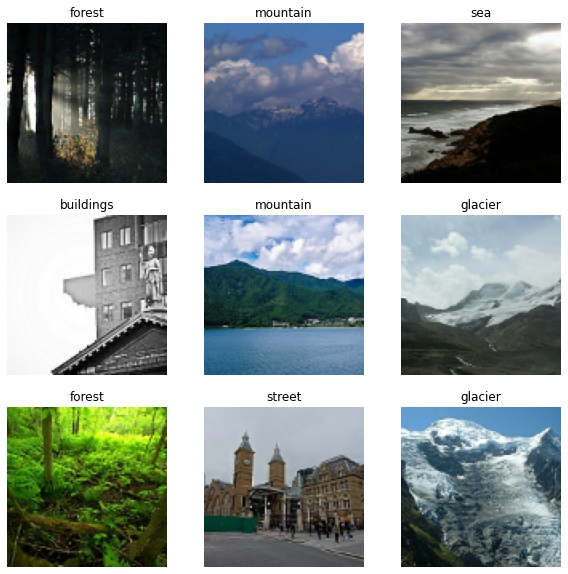

In [ ]:
#Some pictures in validation data

plt.figure(figsize=(10, 10))
for images, labels in valid.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train.class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 3)
(32,)


In [ ]:
classes=train.class_names
num_classes = len(train.class_names)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(100,
                                  100,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
#Defining Model

model = Sequential([
    data_augmentation,
  layers.Rescaling(1./255, input_shape=(100, 100, 3)),
    layers.Flatten(),
  layers.Dense(100, activation='relu'),
  #layers.Dropout(0.2),
  layers.Dense(100, activation='relu'),
  layers.Dense(100, activation='relu'),
  layers.Dense(100, activation='relu'),
  layers.Dense(100, activation='relu'),
  layers.Dense(100, activation='relu'),
  layers.Dense(100, activation='relu'),
  layers.Dense(100, activation='relu'),
  layers.Dense(100, activation='relu'),
  layers.Dense(100, activation='relu'),
  layers.Dense(100, activation='relu'),

  layers.Dense(num_classes)
])


In [ ]:
# Compilation of Model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Fitting of the model with training and validation data

epochs=30
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs
)

Epoch 1/30
352/352 [==============================] - 2166s 1s/step - loss: 1.5837 - accuracy: 0.3377 - val_loss: 1.4315 - val_accuracy: 0.4591
Epoch 2/30
352/352 [==============================] - 26s 75ms/step - loss: 1.3769 - accuracy: 0.4547 - val_loss: 1.3341 - val_accuracy: 0.4630
Epoch 3/30
352/352 [==============================] - 26s 75ms/step - loss: 1.3278 - accuracy: 0.4725 - val_loss: 1.3777 - val_accuracy: 0.4548
Epoch 4/30
352/352 [==============================] - 26s 75ms/step - loss: 1.2956 - accuracy: 0.4888 - val_loss: 1.2696 - val_accuracy: 0.5267
Epoch 5/30
352/352 [==============================] - 26s 75ms/step - loss: 1.2665 - accuracy: 0.5010 - val_loss: 1.2250 - val_accuracy: 0.5420
Epoch 6/30
352/352 [==============================] - 26s 75ms/step - loss: 1.2385 - accuracy: 0.5157 - val_loss: 1.1936 - val_accuracy: 0.5530
Epoch 7/30
352/352 [==============================] - 26s 75ms/step - loss: 1.2283 - accuracy: 0.5194 - val_loss: 1.1609 - val_accuracy:

Text(0.5, 1.0, 'Training and Validation Accuracy')

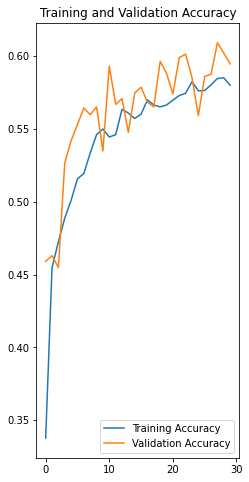

In [ ]:
# Plot of accuracy (Training and validation) over the epochs

val_acc = history.history['val_accuracy']
acc = history.history['accuracy']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [ ]:
# Defining the test data

test=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/adv_ml/seg_test/seg_test',
    labels="inferred",
    batch_size=32,
    image_size=(100, 100),
    seed=123
)

Found 3000 files belonging to 6 classes.


In [ ]:
results = model.evaluate(test, batch_size=32)

94/94 [==============================] - 472s 5s/step - loss: 1.1101 - accuracy: 0.5703


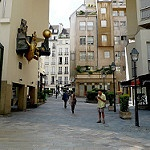

1/1 [==============================] - 0s 19ms/step
The image most likely belongs to street with a 91.07450842857361 percent confidence.


In [ ]:
#Predicting the class of an unlabelled from pred directory (seg_pred folder)

f = "/content/drive/MyDrive/adv_ml/seg_pred/seg_pred/" + random.choice(os.listdir("/content/drive/MyDrive/adv_ml/seg_pred/seg_pred"))
Image(f)
display(Image(f, width=256, height=256))

img = tf.keras.utils.load_img(f, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(f"The image most likely belongs to {format(train.class_names[np.argmax(score)])} with a {100 * np.max(score)} percent confidence.")